In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
from torch import nn


In [ ]:
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder

import zipfile

# Unzip the SANAD_SUBSET.zip file
zip_path = "/content/drive/MyDrive/SANAD_SUBSET.zip"
extract_to = "/content/SANAD_SUBSET"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Files extracted to {extract_to}")



Files extracted to /content/SANAD_SUBSET


In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
import os

def load_sanad_data(base_dir):
    """
    Load SANAD dataset with .txt and .html files into a DataFrame.
    """
    data = []

    # Loop through the directory structure
    for root, dirs, files in os.walk(base_dir):
        for file in files:
            file_path = os.path.join(root, file)

            # Check for .txt and .html files
            if file.endswith('.txt') or file.endswith('.html'):
                # Extract source, split, and category (label) from path
                parts = root.split('/')
                source = parts[-3]  # e.g., akhbarona, arabiya, khaleej
                split = parts[-2]   # e.g., Train or Test
                category = parts[-1]  # e.g., Culture, Finance, etc.

                # Read file content
                with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
                    if file.endswith('.html'):
                        # Parse HTML files
                        soup = BeautifulSoup(f.read(), 'html.parser')
                        text = soup.get_text(strip=True)
                    else:
                        # Read plain text files
                        text = f.read().strip()

                    # Append to data list
                    data.append({
                        'text': text,
                        'label': category,
                        'split': split,
                        'source': source
                    })

    return pd.DataFrame(data)

# Load Dataset
dataset_path = "/content/SANAD_SUBSET"
df = load_sanad_data(dataset_path)

# Verify the loaded data
print("Data loaded successfully!")
print(df.head())
print(f"Total records: {len(df)}")


<ipython-input-6-ae318d95641d>:28: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(f.read(), 'html.parser')


Data loaded successfully!
                                                text label  split   source
0  Body\nدبي:«الخليج» أعلن منظمو معرض ومسابقة «جل...  Tech  Train  khaleej
1  Body\nزار سمو الشيخ راشد بن سعود بن راشد المعل...  Tech  Train  khaleej
2  Body\nدبي: «الخليج» أعلنت كل من شركة الثريا لل...  Tech  Train  khaleej
3  Body\nوزعت اتصالات الجوائز على الدفعة الأولى م...  Tech  Train  khaleej
4  Body\nقدمت باناسونيك مجموعة من حلول العرض الجد...  Tech  Train  khaleej
Total records: 107050


In [ ]:
print(df['source'].value_counts())  # Check the count of sources
print(df['split'].value_counts())   # Check the count of Train/Test
print(df['label'].value_counts())   # Check the count of categories


source
khaleej      45500
akhbarona    43050
arabiya      18500
Name: count, dtype: int64
split
Train    96354
Test     10696
Name: count, dtype: int64
label
Tech        16900
Medical     16900
Politics    16900
Sports      16900
Finance     16900
Culture     13200
Religion     9350
Name: count, dtype: int64


In [ ]:
# Save the transformed data to CSV
output_file = 'sanad_transformed.csv'
df.to_csv(output_file, index=False, encoding='utf-8')

print(f"Data successfully saved to {output_file}")



Data successfully saved to sanad_transformed.csv


In [ ]:
import pandas as pd

# Path to the saved CSV file
csv_file = "sanad_transformed.csv"

# Load the CSV file
df = pd.read_csv(csv_file, encoding='utf-8')

In [ ]:
df

,text,label,split,source
0,Body\nدبي:«الخليج» أعلن منظمو معرض ومسابقة «جل...,Tech,Train,khaleej
1,Body\nزار سمو الشيخ راشد بن سعود بن راشد المعل...,Tech,Train,khaleej
2,Body\nدبي: «الخليج» أعلنت كل من شركة الثريا لل...,Tech,Train,khaleej
3,Body\nوزعت اتصالات الجوائز على الدفعة الأولى م...,Tech,Train,khaleej
4,Body\nقدمت باناسونيك مجموعة من حلول العرض الجد...,Tech,Train,khaleej
...,...,...,...,...
107045,Title\nايفرا يمدد عقده مع يوفنتوس حتى 2017\nSo...,Sports,Test,arabiya
107046,Title\n#بلاتر: قلبي لن ينسى ما حدث \nSource\nز...,Sports,Test,arabiya
107047,Title\nمدرب سوانزي: رانخيل سيخضع لعملية جراحية...,Sports,Test,arabiya
107048,Title\nالشرطة البرازيلية تداهم مقر اللجنة الأو...,Sports,Test,arabiya


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107050 entries, 0 to 107049
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    107050 non-null  object
 1   label   107050 non-null  object
 2   split   107050 non-null  object
 3   source  107050 non-null  object
dtypes: object(4)
memory usage: 3.3+ MB


In [ ]:
import re

# Clean the text column
def clean_text(text):
    """
    Clean the text column by removing 'Title' and 'Body' keywords
    and concatenating the title and body.
    """
    # Remove "Title" and "Body" and any surrounding line breaks
    text = re.sub(r'\bTitle\b[:\n]*', '', text)  # Remove 'Title'
    text = re.sub(r'\bBody\b[:\n]*', '', text)   # Remove 'Body'
    text = re.sub(r'\n+', ' ', text)            # Replace multiple newlines with space
    return text.strip()

# Apply the cleaning function to the 'text' column
df['text'] = df['text'].apply(clean_text)

# Verify the cleaned text
print("\nCleaned Text Example:")
print(df['text'].head())

# Save the cleaned DataFrame
output_cleaned_file = "sanad_cleaned.csv"
df.to_csv(output_cleaned_file, index=False, encoding='utf-8')

print(f"\nCleaned data saved to {output_cleaned_file}")



Cleaned Text Example:
0    إيبولا يفتك بـ 5689 شخصا و15 ألفا على قائمة ال...
1    تحذير من خطورة مرض الحصبة على الصحة بعد ارتفاع...
2    "إيبولا" أكثر الكلمات بحثاً على محرك الأخبار"ي...
3    أحواض أسماك لتخفيف آلام المرضى في فرنسا Source...
4    سوق الأسهم يتأثر بهرمون الكورتيزول وتوتر المتع...
Name: text, dtype: object

Cleaned data saved to sanad_cleaned.csv


In [ ]:
df

,text,label,split,source
0,دبي:«الخليج» أعلن منظمو معرض ومسابقة «جلف كونك...,Tech,Train,khaleej
1,زار سمو الشيخ راشد بن سعود بن راشد المعلا ولي ...,Tech,Train,khaleej
2,دبي: «الخليج» أعلنت كل من شركة الثريا للاتصالا...,Tech,Train,khaleej
3,وزعت اتصالات الجوائز على الدفعة الأولى من الفا...,Tech,Train,khaleej
4,قدمت باناسونيك مجموعة من حلول العرض الجديدة مث...,Tech,Train,khaleej
...,...,...,...,...
107045,ايفرا يمدد عقده مع يوفنتوس حتى 2017 Source روم...,Sports,Test,arabiya
107046,#بلاتر: قلبي لن ينسى ما حدث Source زيوريخ - د...,Sports,Test,arabiya
107047,مدرب سوانزي: رانخيل سيخضع لعملية جراحية Source...,Sports,Test,arabiya
107048,الشرطة البرازيلية تداهم مقر اللجنة الأولمبية S...,Sports,Test,arabiya


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
csv_file = "sanad_cleaned.csv"
df = pd.read_csv(csv_file)



<ipython-input-15-2091a168b8ff>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='label', order=df['label'].value_counts().index, palette='viridis')


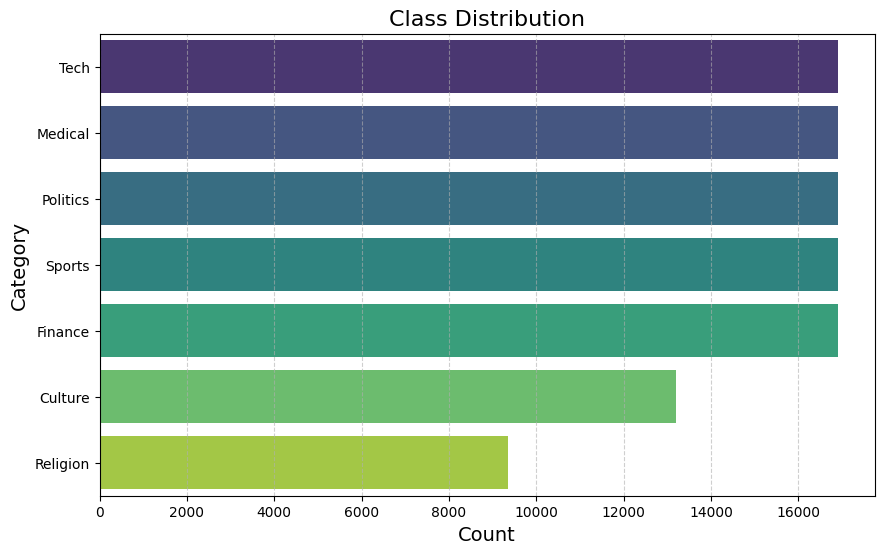

In [ ]:
# Plot Class Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='label', order=df['label'].value_counts().index, palette='viridis')
plt.title('Class Distribution', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


<ipython-input-16-33486890cd80>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='split', palette='coolwarm')


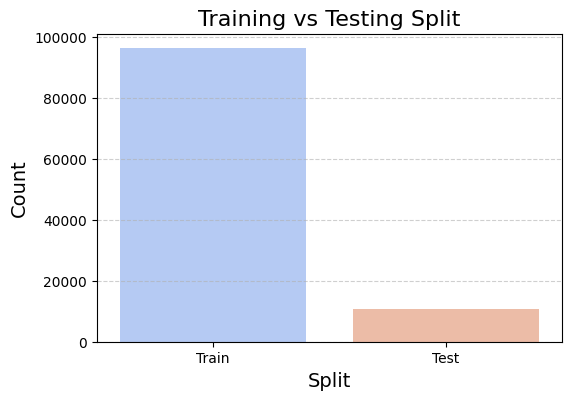

In [ ]:
# Plot Train vs. Test Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='split', palette='coolwarm')
plt.title('Training vs Testing Split', fontsize=16)
plt.xlabel('Split', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


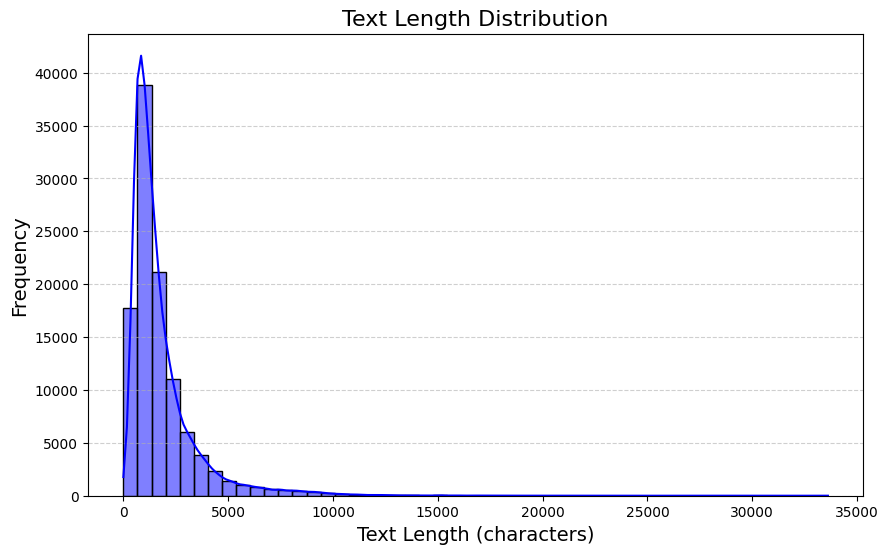

In [ ]:
# Plot Distribution of Text Lengths
df['text_length'] = df['text'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50, kde=True, color='blue')
plt.title('Text Length Distribution', fontsize=16)
plt.xlabel('Text Length (characters)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


<ipython-input-18-9671ddba9fce>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_text_length.values, y=avg_text_length.index, palette='mako')


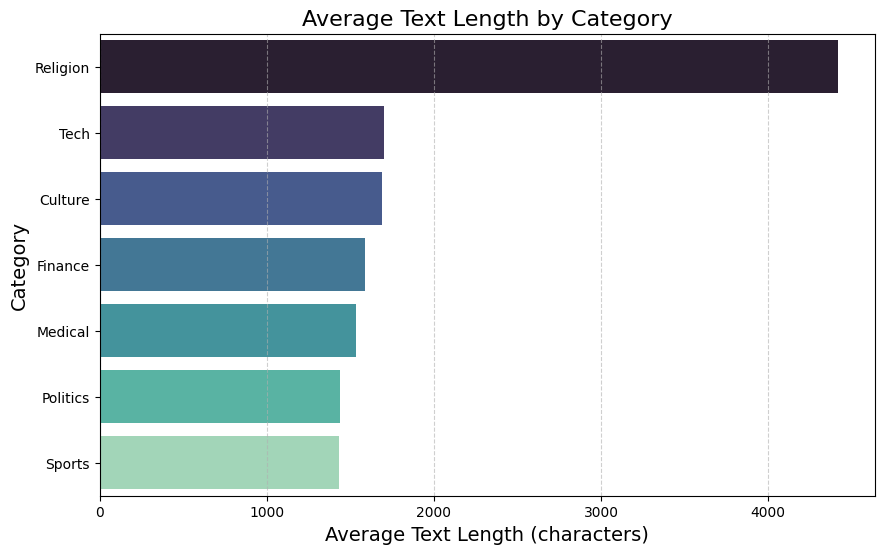

In [ ]:
# Average Text Length Per Category
plt.figure(figsize=(10, 6))
avg_text_length = df.groupby('label')['text_length'].mean().sort_values(ascending=False)
sns.barplot(x=avg_text_length.values, y=avg_text_length.index, palette='mako')
plt.title('Average Text Length by Category', fontsize=16)
plt.xlabel('Average Text Length (characters)', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
csv_file = "/content/drive/MyDrive/sanad_cleaned.csv"
df = pd.read_csv(csv_file)

In [ ]:
# Check the first few rows
print("Dataset Preview:")
print(df.head())

# Verify class distribution
print("\nClass Distribution:")
print(df['label'].value_counts())

Dataset Preview:
                                                text    label  split   source
0  إيبولا يفتك بـ 5689 شخصا و15 ألفا على قائمة ال...  Medical  Train  arabiya
1  تحذير من خطورة مرض الحصبة على الصحة بعد ارتفاع...  Medical  Train  arabiya
2  "إيبولا" أكثر الكلمات بحثاً على محرك الأخبار"ي...  Medical  Train  arabiya
3  أحواض أسماك لتخفيف آلام المرضى في فرنسا Source...  Medical  Train  arabiya
4  سوق الأسهم يتأثر بهرمون الكورتيزول وتوتر المتع...  Medical  Train  arabiya

Class Distribution:
label
Medical     16900
Finance     16900
Sports      16900
Politics    16900
Tech        16900
Culture     13200
Religion     9350
Name: count, dtype: int64


In [ ]:
# Remove missing or empty text
df = df.dropna(subset=['text']).reset_index(drop=True)
df = df[df['text'].str.strip() != ""]

In [ ]:
import re

# Remove special characters and normalize text
def clean_text(text):
    """
    Clean text by removing special characters, extra spaces,
    and normalizing Arabic text.
    """
    # Remove HTML tags and special characters
    text = re.sub(r'<[^>]+>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)     # Replace multiple spaces with a single space

    # Normalize Arabic letters
    arabic_normalization = {
        "أ": "ا", "إ": "ا", "آ": "ا",  # Normalize Alef
        "ى": "ي",                     # Normalize Alef Maksura to Ya
        "ؤ": "و", "ئ": "ي",           # Normalize Hamzas
        "ة": "ه",                     # Normalize Ta Marbuta to Ha
    }
    for letter, normalized in arabic_normalization.items():
        text = text.replace(letter, normalized)

    # Remove diacritics
    diacritics = re.compile(r'[\u064B-\u065F]')
    text = re.sub(diacritics, '', text)

    return text.strip()

df['text'] = df['text'].apply(clean_text)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode labels
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])

# Verify the preprocessing steps
print("Preprocessed Data Example:")
print(df.head())
print("\nUnique Labels:")
print(label_encoder.classes_)

Preprocessed Data Example:
                                                text    label  split   source  \
0  ايبولا يفتك بـ 5689 شخصا و15 الفا علي قايمه ال...  Medical  Train  arabiya   
1  تحذير من خطوره مرض الحصبه علي الصحه بعد ارتفاع...  Medical  Train  arabiya   
2  ايبولا اكثر الكلمات بحثا علي محرك الاخبارياهو ...  Medical  Train  arabiya   
3  احواض اسماك لتخفيف الام المرضي في فرنسا Source...  Medical  Train  arabiya   
4  سوق الاسهم يتاثر بهرمون الكورتيزول وتوتر المتع...  Medical  Train  arabiya   

   label_encoded  
0              2  
1              2  
2              2  
3              2  
4              2  

Unique Labels:
['Culture' 'Finance' 'Medical' 'Politics' 'Religion' 'Sports' 'Tech']


In [ ]:
# Split the dataset into training and testing sets
train_data = df[df['split'] == 'Train']
test_data = df[df['split'] == 'Test']

# Display sizes of the datasets
print(f"Training set size: {len(train_data)}")
print(f"Testing set size: {len(test_data)}")

Training set size: 96354
Testing set size: 10696


In [ ]:
from transformers import BertTokenizer

# Load the tokenizer
tokenizer = BertTokenizer.from_pretrained('aubmindlab/bert-base-arabertv2')

# Tokenize the dataset
def tokenize_data(data, tokenizer, max_length=128):
    return tokenizer(
        list(data['text']),
        padding='max_length',
        truncation=True,
        max_length=max_length,
        return_tensors="pt"
    )

# Tokenize training and testing data
train_tokens = tokenize_data(train_data, tokenizer)
test_tokens = tokenize_data(test_data, tokenizer)

print("Tokenization completed!")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/720k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.31M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

Tokenization completed!


In [ ]:
import torch
from torch.utils.data import Dataset

class SANADDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        # Clone and detach tensors to avoid warnings
        item = {key: val[idx].clone().detach() for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx]).clone().detach()
        return item

    def __len__(self):
        return len(self.labels)


# Encode labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

train_labels = label_encoder.fit_transform(train_data['label'])
test_labels = label_encoder.transform(test_data['label'])

# Create PyTorch datasets
train_dataset = SANADDataset(train_tokens, train_labels)
test_dataset = SANADDataset(test_tokens, test_labels)


In [ ]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments

# Load pre-trained BERT model
model = BertForSequenceClassification.from_pretrained(
    'aubmindlab/bert-base-arabertv2',
    num_labels=len(label_encoder.classes_)
)


model.safetensors:   0%|          | 0.00/543M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at aubmindlab/bert-base-arabertv2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_dir='./logs',
    logging_steps=10,
    learning_rate=2e-5,
    load_best_model_at_end=True,
    report_to="none",  # Disable W&B logging
    run_name="bert-text-classification"  # Custom run name
)


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

# Train the model
trainer.train()

# Evaluate the model
results = trainer.evaluate()
print("Evaluation results:", results)

<ipython-input-25-0735d8891f7c>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch,Training Loss,Validation Loss
1,0.089600,0.126433
2,0.082000,0.118672
3,0.009500,0.118767


<ipython-input-25-0735d8891f7c>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-25-0735d8891f7c>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-25-0735d8891f7c>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-25-0735d8891f7c>:10: UserWarning: To copy construct fro

Evaluation results: {'eval_loss': 0.11867189407348633, 'eval_runtime': 69.4204, 'eval_samples_per_second': 154.076, 'eval_steps_per_second': 4.826, 'epoch': 3.0}


In [ ]:
# Save the fine-tuned model
model.save_pretrained('./fine_tuned_model')
tokenizer.save_pretrained('./fine_tuned_model')

print("Model saved successfully!")


Model saved successfully!


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test dataset
predictions = trainer.predict(test_dataset)
predicted_labels = torch.argmax(torch.tensor(predictions.predictions), axis=1)
true_labels = torch.tensor(test_labels)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Print classification report
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels, target_names=label_encoder.classes_))


<ipython-input-25-0735d8891f7c>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Test Accuracy: 96.74%

Classification Report:
              precision    recall  f1-score   support

     Culture       0.94      0.96      0.95      1320
     Finance       0.97      0.95      0.96      1690
     Medical       0.97      0.99      0.98      1690
    Politics       0.96      0.95      0.96      1690
    Religion       0.96      0.97      0.96       926
      Sports       0.99      0.99      0.99      1690
        Tech       0.97      0.97      0.97      1690

    accuracy                           0.97     10696
   macro avg       0.97      0.97      0.97     10696
weighted avg       0.97      0.97      0.97     10696



In [ ]:
import shutil

# Zip the model folder
shutil.make_archive("fine_tuned_model", 'zip', "./fine_tuned_model")

print("Model zipped successfully!")


Model zipped successfully!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Copy model to Google Drive
!cp -r ./fine_tuned_model /content/drive/MyDrive/
print("Model saved to Google Drive!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model saved to Google Drive!


In [ ]:
# Unzip the uploaded file
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/fine_tuned_model.zip", 'r') as zip_ref:
    zip_ref.extractall("./fine_tuned_model")

print("Fine-tuned model extracted!")


Fine-tuned model extracted!


In [ ]:
from transformers import BertForSequenceClassification, BertTokenizer

# Load the fine-tuned model and tokenizer
fine_tuned_model = BertForSequenceClassification.from_pretrained('/content/fine_tuned_model/fine_tuned_model')
tokenizer = BertTokenizer.from_pretrained('/content/fine_tuned_model/fine_tuned_model')

print("Fine-tuned model and tokenizer loaded successfully!")


Fine-tuned model and tokenizer loaded successfully!


In [ ]:
import torch
from torch import nn

In [ ]:
class DifferentialAttention(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super().__init__()
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads

        if embed_dim % num_heads != 0:
            raise ValueError("Embedding dimension must be divisible by the number of heads.")

        # Linear layers for Q, K, V projections
        self.q_linear = nn.Linear(embed_dim, 2 * embed_dim)  # Double size for Q1/Q2
        self.k_linear = nn.Linear(embed_dim, 2 * embed_dim)  # Double size for K1/K2
        self.v_linear = nn.Linear(embed_dim, embed_dim)

        # Learnable parameters for lambda calculation
        self.lambda_q1 = nn.Parameter(torch.randn(self.head_dim))
        self.lambda_k1 = nn.Parameter(torch.randn(self.head_dim))
        self.lambda_q2 = nn.Parameter(torch.randn(self.head_dim))
        self.lambda_k2 = nn.Parameter(torch.randn(self.head_dim))
        self.lambda_init = nn.Parameter(torch.tensor(0.8))

    def forward(
        self,
        hidden_states,
        attention_mask=None,
        head_mask=None,
        encoder_hidden_states=None,
        encoder_attention_mask=None,
        past_key_value=None,
        output_attentions=False,
    ):
        """
        Differential Attention forward pass.
        """
        batch_size, seq_length, embed_dim = hidden_states.size()
        assert embed_dim == self.embed_dim, "Embedding dimension mismatch."

        # Project Q, K, V
        Q = self.q_linear(hidden_states)  # Shape: (batch_size, seq_length, 2 * embed_dim)
        K = self.k_linear(hidden_states)  # Shape: (batch_size, seq_length, 2 * embed_dim)
        V = self.v_linear(hidden_states)  # Shape: (batch_size, seq_length, embed_dim)

        # Split Q, K into Q1/Q2 and K1/K2
        Q1, Q2 = Q.split(self.embed_dim, dim=-1)
        K1, K2 = K.split(self.embed_dim, dim=-1)

        # Reshape for multi-head attention
        Q1 = Q1.view(batch_size, seq_length, self.num_heads, self.head_dim).permute(0, 2, 1, 3)
        Q2 = Q2.view(batch_size, seq_length, self.num_heads, self.head_dim).permute(0, 2, 1, 3)
        K1 = K1.view(batch_size, seq_length, self.num_heads, self.head_dim).permute(0, 2, 1, 3)
        K2 = K2.view(batch_size, seq_length, self.num_heads, self.head_dim).permute(0, 2, 1, 3)
        V = V.view(batch_size, seq_length, self.num_heads, self.head_dim).permute(0, 2, 1, 3)

        # Compute attention scores
        attention_1 = torch.matmul(Q1, K1.transpose(-2, -1)) / self.head_dim ** 0.5  # Shape: (batch_size, num_heads, seq_length, seq_length)
        attention_2 = torch.matmul(Q2, K2.transpose(-2, -1)) / self.head_dim ** 0.5

        # Apply softmax to attention scores
        attention_1 = torch.softmax(attention_1, dim=-1)
        attention_2 = torch.softmax(attention_2, dim=-1)

        # Compute lambda term
        lambda_term = (
            torch.exp(self.lambda_q1 @ self.lambda_k1) -
            torch.exp(self.lambda_q2 @ self.lambda_k2) +
            self.lambda_init
        )

        # Compute differential attention
        differential_attention = (attention_1 - lambda_term * attention_2) @ V  # Shape: (batch_size, num_heads, seq_length, head_dim)

        # Reshape back to original format
        differential_attention = differential_attention.permute(0, 2, 1, 3).contiguous()
        differential_attention = differential_attention.view(batch_size, seq_length, embed_dim)

        # Return the attention output and optionally the attention scores
        if output_attentions:
            return (differential_attention, attention_1 - lambda_term * attention_2)
        return (differential_attention,)


In [ ]:
from transformers.models.bert.modeling_bert import BertEncoder

class CustomBertEncoder(BertEncoder):
    def __init__(self, config):
        super().__init__(config)

        # Replace 25%-50% of attention layers
        layers_to_replace = int(len(self.layer) * 0.25)
        indices_to_replace = torch.randperm(len(self.layer))[:layers_to_replace]

        for idx in indices_to_replace:
            self.layer[idx].attention.self = DifferentialAttention(
                embed_dim=config.hidden_size,
                num_heads=config.num_attention_heads
            )


In [ ]:
from transformers.models.bert.modeling_bert import BertModel, BertPreTrainedModel

class CustomBertModel(BertPreTrainedModel):
    def __init__(self, config):
        super().__init__(config)

        # Use the original BERT model with the custom encoder
        self.bert = BertModel(config)
        self.bert.encoder = CustomBertEncoder(config)  # Replace encoder

        # Classification head
        self.classifier = nn.Linear(config.hidden_size, config.num_labels)

    def forward(self, input_ids, attention_mask=None, labels=None):
        # Forward pass through BERT
        outputs = self.bert(input_ids, attention_mask=attention_mask)
        logits = self.classifier(outputs.pooler_output)

        # Compute loss if labels are provided
        loss = None
        if labels is not None:
            loss_fct = nn.CrossEntropyLoss()
            loss = loss_fct(logits, labels)

        return {'loss': loss, 'logits': logits}


In [ ]:
from transformers import Trainer, TrainingArguments

# Initialize the modified BERT model
model = CustomBertModel.from_pretrained(
    'aubmindlab/bert-base-arabertv2',
    num_labels=len(label_encoder.classes_)
)

# Define training arguments with aligned strategies
training_args = TrainingArguments(
    output_dir='./modified_results',
    evaluation_strategy="epoch",  # Evaluate at the end of each epoch
    save_strategy="epoch",        # Save the model at the end of each epoch
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./modified_logs',
    load_best_model_at_end=True   # Ensure best model is loaded at the end
)

print("Training arguments updated successfully!")




Some weights of CustomBertModel were not initialized from the model checkpoint at aubmindlab/bert-base-arabertv2 and are newly initialized: ['bert.encoder.layer.0.attention.self.k_linear.bias', 'bert.encoder.layer.0.attention.self.k_linear.weight', 'bert.encoder.layer.0.attention.self.lambda_init', 'bert.encoder.layer.0.attention.self.lambda_k1', 'bert.encoder.layer.0.attention.self.lambda_k2', 'bert.encoder.layer.0.attention.self.lambda_q1', 'bert.encoder.layer.0.attention.self.lambda_q2', 'bert.encoder.layer.0.attention.self.q_linear.bias', 'bert.encoder.layer.0.attention.self.q_linear.weight', 'bert.encoder.layer.0.attention.self.v_linear.bias', 'bert.encoder.layer.0.attention.self.v_linear.weight', 'bert.encoder.layer.4.attention.self.k_linear.bias', 'bert.encoder.layer.4.attention.self.k_linear.weight', 'bert.encoder.layer.4.attention.self.lambda_init', 'bert.encoder.layer.4.attention.self.lambda_k1', 'bert.encoder.layer.4.attention.self.lambda_k2', 'bert.encoder.layer.4.attention

Training arguments updated successfully!


In [ ]:
import os
os.environ["WANDB_DISABLED"] = "true"


In [ ]:
# Train the model
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

trainer.train()

# Evaluate the modified model
modified_results = trainer.evaluate()
print("Modified Model Evaluation Results:", modified_results)


Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss
1,0.251600,0.250112
2,0.167500,0.220686
3,0.128000,0.204760


Modified Model Evaluation Results: {'eval_loss': 0.2047596126794815, 'eval_runtime': 74.6455, 'eval_samples_per_second': 143.291, 'eval_steps_per_second': 4.488, 'epoch': 3.0}


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Save the modified model to Google Drive
model_save_path = "/content/drive/MyDrive/modified_model"
model.save_pretrained(model_save_path)
tokenizer.save_pretrained(model_save_path)

print(f"Modified model saved successfully to {model_save_path}!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Modified model saved successfully to /content/drive/MyDrive/modified_model!


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score

# Generate predictions for the modified model
modified_preds = trainer.predict(test_dataset).predictions
modified_labels = np.argmax(modified_preds, axis=1)

# Calculate accuracy
modified_accuracy = accuracy_score(test_labels, modified_labels)
print(f"Modified Model Test Accuracy: {modified_accuracy * 100:.2f}%")

# Generate classification report
print("\nModified Model Classification Report:")
print(classification_report(test_labels, modified_labels, target_names=label_encoder.classes_))


Modified Model Test Accuracy: 94.77%

Modified Model Classification Report:
              precision    recall  f1-score   support

     Culture       0.92      0.93      0.92      1320
     Finance       0.94      0.93      0.94      1690
     Medical       0.96      0.97      0.96      1690
    Politics       0.93      0.93      0.93      1690
    Religion       0.93      0.93      0.93       926
      Sports       0.99      0.98      0.99      1690
        Tech       0.96      0.95      0.95      1690

    accuracy                           0.95     10696
   macro avg       0.95      0.95      0.95     10696
weighted avg       0.95      0.95      0.95     10696



In [ ]:
import numpy as np
import json

# Save predictions for the modified model
modified_preds_save_path = "/content/drive/MyDrive/modified_predictions.npy"
np.save(modified_preds_save_path, modified_preds)

# Save evaluation metrics for the modified model
modified_eval_save_path = "/content/drive/MyDrive/modified_eval_results.json"
with open(modified_eval_save_path, "w") as f:
    json.dump(modified_results, f)

print(f"Modified predictions saved to {modified_preds_save_path}!")
print(f"Modified evaluation results saved to {modified_eval_save_path}!")


Modified predictions saved to /content/drive/MyDrive/modified_predictions.npy!
Modified evaluation results saved to /content/drive/MyDrive/modified_eval_results.json!


In [ ]:
classification_report_text = classification_report(
    test_labels, modified_labels, target_names=label_encoder.classes_
)
classification_report_path = "/content/drive/MyDrive/modified_classification_report.txt"
with open(classification_report_path, "w") as f:
    f.write(classification_report_text)

print(f"Modified classification report saved to {classification_report_path}!")


Modified classification report saved to /content/drive/MyDrive/modified_classification_report.txt!


In [ ]:
tokenized_data_path = "/content/drive/MyDrive/modified_test_tokens.npz"
np.savez(
    tokenized_data_path,
    input_ids=test_tokens['input_ids'].numpy(),
    attention_mask=test_tokens['attention_mask'].numpy()
)
print(f"Tokenized test dataset saved to {tokenized_data_path}!")


Tokenized test dataset saved to /content/drive/MyDrive/modified_test_tokens.npz!


In [ ]:
import numpy as np
import torch

# Load tokenized test dataset
fine_tuned_test_tokens_path = "/content/drive/MyDrive/fine_tuned_test_tokens.npz"
loaded_data = np.load(fine_tuned_test_tokens_path)

# Prepare the tokenized test dataset
test_tokens = {
    "input_ids": torch.tensor(loaded_data['input_ids']),
    "attention_mask": torch.tensor(loaded_data['attention_mask']),
}
test_dataset = torch.utils.data.TensorDataset(
    test_tokens['input_ids'],
    test_tokens['attention_mask'],
    torch.tensor(test_labels)  # Ensure test_labels is defined
)

print("Fine-tuned test tokens loaded successfully!")


Fine-tuned test tokens loaded successfully!


In [ ]:
import json

# Load evaluation metrics
fine_tuned_eval_results_path = "/content/drive/MyDrive/fine_tuned_eval_results.json"
with open(fine_tuned_eval_results_path, "r") as f:
    fine_tuned_eval_results = json.load(f)

# Load the classification report
fine_tuned_classification_report_path = "/content/drive/MyDrive/fine_tuned_classification_report.txt"
with open(fine_tuned_classification_report_path, "r") as f:
    fine_tuned_classification_report = f.read()

print("Fine-tuned model evaluation results and classification report loaded successfully!")


Fine-tuned model evaluation results and classification report loaded successfully!


In [ ]:
# Load fine-tuned predictions
fine_tuned_predictions_path = "/content/drive/MyDrive/fine_tuned_predictions.npy"
predictions = np.load(fine_tuned_predictions_path)

# Convert logits to predicted labels
original_labels = np.argmax(predictions, axis=1)

print("Fine-tuned model predictions loaded successfully!")


Fine-tuned model predictions loaded successfully!


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Fine-tuned model accuracy
fine_tuned_accuracy = fine_tuned_eval_results["accuracy"]
print(f"Fine-Tuned Model Accuracy: {fine_tuned_accuracy * 100:.2f}%")

# Modified model accuracy (ensure modified_accuracy is already calculated)
print(f"Modified Model Accuracy: {modified_accuracy * 100:.2f}%")

# Compare classification reports
print("\nFine-Tuned Model Classification Report:")
print(fine_tuned_classification_report)

print("\nModified Model Classification Report:")
print(classification_report(test_labels, modified_labels, target_names=label_encoder.classes_))


Fine-Tuned Model Accuracy: 96.44%
Modified Model Accuracy: 94.77%

Fine-Tuned Model Classification Report:
              precision    recall  f1-score   support

     Culture       0.93      0.96      0.95      1320
     Finance       0.96      0.95      0.95      1690
     Medical       0.97      0.98      0.98      1690
    Politics       0.97      0.94      0.95      1690
    Religion       0.95      0.97      0.96       926
      Sports       1.00      0.99      0.99      1690
        Tech       0.96      0.97      0.97      1690

    accuracy                           0.96     10696
   macro avg       0.96      0.96      0.96     10696
weighted avg       0.96      0.96      0.96     10696


Modified Model Classification Report:
              precision    recall  f1-score   support

     Culture       0.92      0.93      0.92      1320
     Finance       0.94      0.93      0.94      1690
     Medical       0.96      0.97      0.96      1690
    Politics       0.93      0.93      0

In [ ]:
with open("/content/drive/MyDrive/comparison_results.txt", "w") as f:
    f.write("Fine-Tuned Model Accuracy: 96.44%\n")
    f.write("Modified Model Accuracy: 94.77%\n\n")
    f.write("Fine-Tuned Model Classification Report:\n")
    f.write(fine_tuned_classification_report + "\n\n")
    f.write("Modified Model Classification Report:\n")
    f.write(classification_report(test_labels, modified_labels, target_names=label_encoder.classes_))
print("Comparison results saved successfully!")


Comparison results saved successfully!


In [ ]:
# Example text
example_text = "حقق المنتخب الوطني فوزاً كبيراً في المباراة النهائية لبطولة كأس الأمم الإفريقية."


# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move models to the device
model.to(device)
fine_tuned_model.to(device)

# Tokenize the example text
inputs = tokenizer(
    example_text,
    return_tensors="pt",
    truncation=True,
    padding="max_length",
    max_length=128
)

# Remove token_type_ids as CustomBertModel doesn't use it
inputs.pop("token_type_ids", None)

# Move inputs to the device
inputs = {key: value.to(device) for key, value in inputs.items()}

# Fine-tuned model prediction
fine_tuned_output = fine_tuned_model(**inputs)
fine_tuned_pred_label = label_encoder.inverse_transform([torch.argmax(fine_tuned_output.logits).item()])

# Modified model prediction
modified_output = model(**inputs)
logits = modified_output["logits"]  # Access logits from the dictionary
modified_pred_label = label_encoder.inverse_transform([torch.argmax(logits).item()])

# Display predictions
print(f"Text: {example_text}")
print(f"Fine-Tuned Model Prediction: {fine_tuned_pred_label[0]}")
print(f"Modified Model Prediction: {modified_pred_label[0]}")


Text: حقق المنتخب الوطني فوزاً كبيراً في المباراة النهائية لبطولة كأس الأمم الإفريقية.
Fine-Tuned Model Prediction: Sports
Modified Model Prediction: Sports


In [ ]:
# Example text
example_text = "ارتفعت مؤشرات الأسهم العالمية بشكل ملحوظ بعد الإعلان عن سياسات اقتصادية جديدة."

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move models to the device
model.to(device)
fine_tuned_model.to(device)

# Tokenize the example text
inputs = tokenizer(
    example_text,
    return_tensors="pt",
    truncation=True,
    padding="max_length",
    max_length=128
)

# Remove token_type_ids as CustomBertModel doesn't use it
inputs.pop("token_type_ids", None)

# Move inputs to the device
inputs = {key: value.to(device) for key, value in inputs.items()}

# Fine-tuned model prediction
fine_tuned_output = fine_tuned_model(**inputs)
fine_tuned_pred_label = label_encoder.inverse_transform([torch.argmax(fine_tuned_output.logits).item()])

# Modified model prediction
modified_output = model(**inputs)
logits = modified_output["logits"]  # Access logits from the dictionary
modified_pred_label = label_encoder.inverse_transform([torch.argmax(logits).item()])

# Display predictions
print(f"Text: {example_text}")
print(f"Fine-Tuned Model Prediction: {fine_tuned_pred_label[0]}")
print(f"Modified Model Prediction: {modified_pred_label[0]}")

Text: ارتفعت مؤشرات الأسهم العالمية بشكل ملحوظ بعد الإعلان عن سياسات اقتصادية جديدة.
Fine-Tuned Model Prediction: Finance
Modified Model Prediction: Finance


In [ ]:
# Example text
example_text = "تقام غداً فعاليات مهرجان السينما الدولي بمشاركة أشهر المخرجين والفنانين العرب."


# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move models to the device
model.to(device)
fine_tuned_model.to(device)

# Tokenize the example text
inputs = tokenizer(
    example_text,
    return_tensors="pt",
    truncation=True,
    padding="max_length",
    max_length=128
)

# Remove token_type_ids as CustomBertModel doesn't use it
inputs.pop("token_type_ids", None)

# Move inputs to the device
inputs = {key: value.to(device) for key, value in inputs.items()}

# Fine-tuned model prediction
fine_tuned_output = fine_tuned_model(**inputs)
fine_tuned_pred_label = label_encoder.inverse_transform([torch.argmax(fine_tuned_output.logits).item()])

# Modified model prediction
modified_output = model(**inputs)
logits = modified_output["logits"]  # Access logits from the dictionary
modified_pred_label = label_encoder.inverse_transform([torch.argmax(logits).item()])

# Display predictions
print(f"Text: {example_text}")
print(f"Fine-Tuned Model Prediction: {fine_tuned_pred_label[0]}")
print(f"Modified Model Prediction: {modified_pred_label[0]}")

Text: تقام غداً فعاليات مهرجان السينما الدولي بمشاركة أشهر المخرجين والفنانين العرب.
Fine-Tuned Model Prediction: Culture
Modified Model Prediction: Culture


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
import torch
from transformers import BertTokenizer

# Example texts for testing
example_texts = {
    "Medical": [
        "الأطباء يؤكدون أن النوم الكافي يحسن مناعة الجسم ويساعد في تقليل خطر الإصابة بالأمراض المزمنة مثل السكري وأمراض القلب."
    ],
    "Tech": [
        "باحثون يعلنون عن تطوير أول حاسوب كمي يعمل بطاقة أقل ويقدم أداءً أسرع بعشرات المرات من الحواسيب التقليدية."
    ],
    "Religion": [
        "فضل قراءة سورة يس يوم الجمعة وآثارها الروحية على حياة المسلم، حيث تعتبر من السور التي تبعث الطمأنينة وتزيد من التقرب إلى الله."
    ],
    "Politics": [
        "خلال اجتماع الجمعية العامة للأمم المتحدة، ناقش القادة العالميون تداعيات الحرب الاقتصادية بين الدول الكبرى، مع التركيز على أهمية دعم الدول النامية لتجنب تفاقم الأزمات الإنسانية."
    ],
    "Finance": [
        "البنك المركزي يرفع أسعار الفائدة لمواجهة التضخم وتثبيت الاستقرار الاقتصادي. القرار يأتي استجابةً لتقلبات السوق العالمية ويهدف إلى الحد من تأثير ارتفاع الأسعار على الأسر والشركات الصغيرة."
    ],
    "Sports": [
        "الاتحاد الدولي لكرة القدم يعلن عن تطبيق تقنية الفيديو المساعد (VAR) في جميع البطولات الرسمية لضمان دقة القرارات التحكيمية وتحقيق العدالة في المباريات."
    ],
    "Culture": [
        "افتتاح معرض للفن الحديث يضم لوحات ومنحوتات لفنانين عالميين ومحليين."
    ]
}

# Ensure the model is on the correct device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
fine_tuned_model = fine_tuned_model.to(device)
model = model.to(device)  # Modified model

# Iterate over categories and test predictions
for category, texts in example_texts.items():
    print(f"Testing examples for category: {category}")
    for text in texts:
        # Tokenize the example text
        inputs = tokenizer(text, return_tensors="pt", truncation=True, padding="max_length", max_length=128)

        # Move inputs to the same device as the model
        inputs = {key: val.to(device) for key, val in inputs.items()}

        # Predict with the fine-tuned model
        fine_tuned_output = fine_tuned_model(**inputs)
        fine_tuned_pred_label = label_encoder.inverse_transform([torch.argmax(fine_tuned_output.logits).item()])

        # Predict with the modified model
        modified_output = model(**inputs)
        modified_pred_label = label_encoder.inverse_transform([torch.argmax(modified_output["logits"]).item()])

        # Display predictions
        print(f"Text: {text}")
        print(f"Fine-Tuned Model Prediction: {fine_tuned_pred_label[0]}")
        print(f"Modified Model Prediction: {modified_pred_label[0]}")
        print("-" * 50)


Testing examples for category: Medical
Text: الأطباء يؤكدون أن النوم الكافي يحسن مناعة الجسم ويساعد في تقليل خطر الإصابة بالأمراض المزمنة مثل السكري وأمراض القلب.
Fine-Tuned Model Prediction: Medical
Modified Model Prediction: Finance
--------------------------------------------------
Testing examples for category: Tech
Text: باحثون يعلنون عن تطوير أول حاسوب كمي يعمل بطاقة أقل ويقدم أداءً أسرع بعشرات المرات من الحواسيب التقليدية.
Fine-Tuned Model Prediction: Tech
Modified Model Prediction: Tech
--------------------------------------------------
Testing examples for category: Religion
Text: فضل قراءة سورة يس يوم الجمعة وآثارها الروحية على حياة المسلم، حيث تعتبر من السور التي تبعث الطمأنينة وتزيد من التقرب إلى الله.
Fine-Tuned Model Prediction: Religion
Modified Model Prediction: Finance
--------------------------------------------------
Testing examples for category: Politics
Text: خلال اجتماع الجمعية العامة للأمم المتحدة، ناقش القادة العالميون تداعيات الحرب الاقتصادية بين الدول الكبرى،